# Librerias

In [66]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [67]:
import warnings
warnings.filterwarnings("ignore")

# Datos

In [81]:
df = pd.read_excel('datos.xlsx')
df.replace(0, np.nan, inplace=True)

### Separacion Train Test

In [69]:
train = df[:int(0.85*(len(df)))]
test = df[int(0.85*(len(df))):]

# Modelos

## Prophet

In [70]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [71]:
tr_proph = pd.DataFrame({
    'ds': train['mes'],
    'y': train['v_retail']
})
ts_proph = pd.DataFrame({
    'ds': test['mes'],
    'y': test['v_retail']
})

In [72]:
tr_proph

,ds,y
0,2016-12-01,NaN
1,2017-01-01,4.343371e+06
2,2017-02-01,4.265286e+06
3,2017-03-01,5.086280e+06
4,2017-04-01,5.224931e+06
...,...,...
63,2022-03-01,3.125616e+06
64,2022-04-01,3.487264e+06
65,2022-05-01,3.371254e+06
66,2022-06-01,3.252679e+06


In [73]:
m = Prophet(interval_width=0.95)
m.fit(tr_proph)

12:23:34 - cmdstanpy - INFO - Chain [1] start processing


12:23:34 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
fut_proph = m.make_future_dataframe(periods=ts_proph.shape[0], freq='MS')

In [75]:
fcst_proph = m.predict(fut_proph)
fcst_proph[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
75,2023-04-01,3.577597e+06,2.683399e+06,4.565786e+06
76,2023-05-01,3.432005e+06,2.493456e+06,4.370969e+06
77,2023-06-01,3.963287e+06,3.032952e+06,4.912786e+06
78,2023-07-01,3.865001e+06,2.916098e+06,4.852785e+06
79,2023-08-01,3.297988e+06,2.236436e+06,4.288125e+06


In [76]:
pred_proph = fcst_proph[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [77]:
tr_proph

,ds,y
0,2016-12-01,NaN
1,2017-01-01,4.343371e+06
2,2017-02-01,4.265286e+06
3,2017-03-01,5.086280e+06
4,2017-04-01,5.224931e+06
...,...,...
63,2022-03-01,3.125616e+06
64,2022-04-01,3.487264e+06
65,2022-05-01,3.371254e+06
66,2022-06-01,3.252679e+06


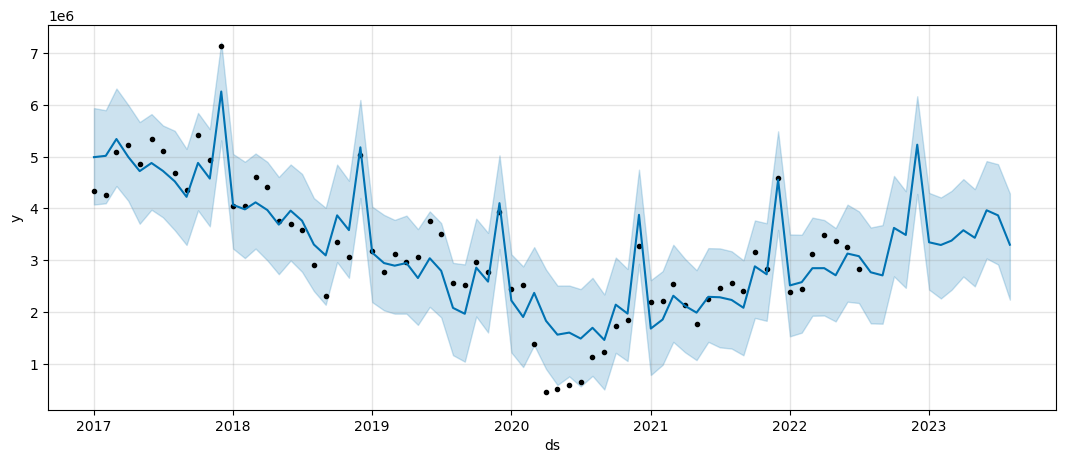

In [78]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(13)
fig = m.plot(fcst_proph,ax=ax)
plt.show()

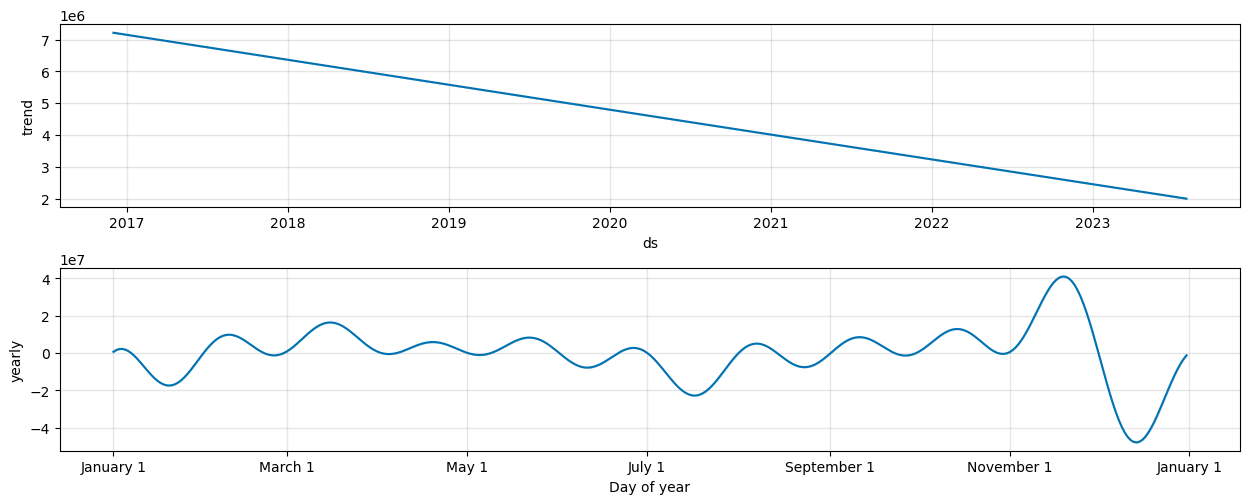

In [99]:
fig2 = m.plot_components(fcst_proph)
fig2.set_figheight(5)
fig2.set_figwidth(13)